(array([59.,  0.,  0.,  0.,  0., 71.,  0.,  0.,  0., 48.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

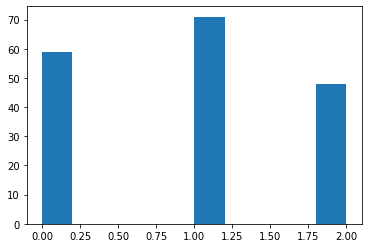

In [ ]:
#step 1: Load the wine  dataset from sklearn datasets
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
X,y=datasets.load_wine(return_X_y=True)
X.shape
np.unique(y,return_counts=True)
plt.hist(y)

In [ ]:
#Step 2: Randomly split the dataset into 20 percent test data and 80 percent training data
from sklearn.model_selection import train_test_split
print("Label proportion in whole dataset :",np.unique(y),np.unique(y,return_counts=True)[1]*100/y.shape[0])

X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,shuffle=True,random_state=42)
print("Label proportion in training dataset without stratify :",np.unique(y_train),np.unique(y_train,return_counts=True)[1]*100/y_train.shape[0])
print("Label proportion in test dataset without stratify  :",np.unique(y_test),np.unique(y_test,return_counts=True)[1]*100/y_test.shape[0])

X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,shuffle=True,random_state=42,stratify=y)
print("Label proportion in train dataset with stratify:",np.unique(y_train,return_counts=True)[1]*100/y_train.shape[0])
print("Label proportion in test dataset with stratify:",np.unique(y_test,return_counts=True)[1]*100/y_test.shape[0])


Label proportion in whole dataset : [0 1 2] [33.14606742 39.88764045 26.96629213]
Label proportion in training dataset without stratify : [0 1 2] [32.25806452 40.32258065 27.41935484]
Label proportion in test dataset without stratify  : [0 1 2] [35.18518519 38.88888889 25.92592593]
Label proportion in train dataset with stratify: [33.06451613 40.32258065 26.61290323]
Label proportion in test dataset with stratify: [33.33333333 38.88888889 27.77777778]


In [ ]:
#Step 3: Standardize the features
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)

In [ ]:
#Step 4: Classify data using SVM with C=0.001,kernel=linear
from sklearn.svm import SVC

clf=SVC(C=0.001,kernel='linear',class_weight='balanced')
clf.fit(X_train_std,y_train)

SVC(C=0.001, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [ ]:
#Step 5: Calculate and print the accuracy score of your model (test and train).
from sklearn.metrics import accuracy_score
y_predict_test=clf.predict(X_test_std)
y_predict_train=clf.predict(X_train_std)
print("test accuracy:", accuracy_score(y_test,y_predict_test) )
print("train accuracy:", accuracy_score(y_train,y_predict_train) )


test accuracy: 0.7037037037037037
train accuracy: 0.6612903225806451


              precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       1.00      0.24      0.38        21
           2       0.52      1.00      0.68        15

    accuracy                           0.70        54
   macro avg       0.81      0.75      0.67        54
weighted avg       0.83      0.70      0.65        54



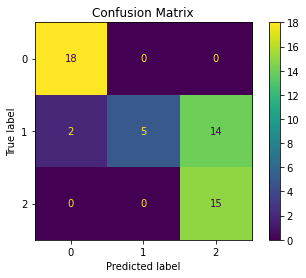

In [ ]:
from sklearn.metrics import classification_report,plot_confusion_matrix
import matplotlib.pyplot as plt
print(classification_report(y_test,y_predict_test))
confusion=plot_confusion_matrix(clf,X_test_std,y_test)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#Step 7: Classify data using SVM   with C=[ 0.01, 0.1, 1.0, 10.0] and gamma=[ 0.01, 0.1, 1.0, 10.0]] and accuracy score of your model.
C=[ 0.01, 0.1, 1.0, 10.0]
gamma=[ 0.01, 0.1, 1.0, 10.0]

best_score=0.0
best_C=0.0
best_gamma=0.0
best_kernel=''
for k in ['linear','rbf']:
  for i in C:
    for j in gamma:
      score=0.0
      clf=SVC(C=i,gamma=j,kernel=k,class_weight='balanced')
      clf.fit(X_train_std,y_train)
      y_predict_train=clf.predict(X_train_std)
      score=accuracy_score(y_train,y_predict_train)
      if score>=best_score:
        best_score=score
        best_C=i
        best_gamma=j
        best_kernel=k
print("best parameter C:", best_C,"best parameter gamma:",best_gamma,"best parameter kernel:",best_kernel )
clf_best=SVC(C=best_C,gamma=best_gamma,kernel=best_kernel)
clf_best.fit(X_train_std,y_train)
y_predict_test=clf_best.predict(X_test_std)
print("test accuracy:",accuracy_score(y_test,y_predict_test))
print("train accuracy:",best_score)


best parameter C: 10.0 best parameter gamma: 10.0 best parameter kernel: rbf
test accuracy: 0.3888888888888889
train accuracy: 1.0


best parameter C: 1.0 best parameter gamma: 0.01 best parameter kernel: rbf
test accuracy: 1.0
validation accuracy: 1.0


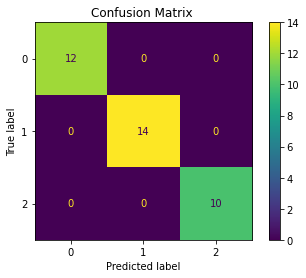

In [ ]:
#Step 8: Classify data using SVM   with C=[ 0.01, 0.1, 1.0, 10.0] and gamma=[ 0.01, 0.1, 1.0, 10.0]] and accuracy score of your model. Use validation set
from sklearn.model_selection import train_test_split
X_train_and_validation,X_test,y_train_and_validation,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=42,stratify=y)
X_train,X_validation,y_train,y_validation=train_test_split(X_train_and_validation,y_train_and_validation,test_size=0.25,random_state=42,stratify=y_train_and_validation)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_validation_std=sc.transform(X_validation)
X_test_std=sc.transform(X_test)
C=[ 0.01, 0.1, 1.0, 10.0]
gamma=[ 0.01, 0.1, 1.0, 10.0]

best_score=0.0
best_C=0.0
best_gamma=0.0
best_kernel=''
for k in ['linear','rbf']:
  for i in C:
    for j in gamma:
      score=0.0
      clf=SVC(C=i,gamma=j,kernel=k,class_weight='balanced')
      clf.fit(X_train_std,y_train)
      y_predict_validation=clf.predict(X_validation_std)
      score=accuracy_score(y_validation,y_predict_validation)
      if score>=best_score:
        best_score=score
        best_C=i
        best_gamma=j
        best_kernel=k
print("best parameter C:", best_C,"best parameter gamma:",best_gamma,"best parameter kernel:",best_kernel )
clf_best=SVC(C=best_C,gamma=best_gamma,kernel=best_kernel)

clf_best.fit(np.vstack((X_train_std,X_validation_std)),np.hstack((y_train,y_validation)))
y_predict_test=clf_best.predict(X_test_std)
print("test accuracy:",accuracy_score(y_test,y_predict_test))
print("validation accuracy:",best_score)
confusion=plot_confusion_matrix(clf_best,X_test_std,y_test)
plt.title("Confusion Matrix ")
plt.show()


0.99
{'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}
0.9722222222222222
Hata matrisi:
 [[12  0  0]
 [ 0 14  0]
 [ 0  1  9]]


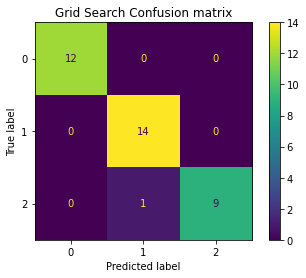

In [ ]:
from sklearn.model_selection import GridSearchCV
param_range = [ 0.01, 0.1, 1.0, 10.0]
clf=SVC(class_weight='balanced')
grid={'C':param_range,'gamma':param_range,'kernel':['rbf','linear']}
clf_gs=GridSearchCV(estimator=clf,param_grid=grid,cv=10,scoring='accuracy',n_jobs=-1)
clf_gs=clf_gs.fit(X_train_std,y_train)
print(clf_gs.best_score_)
print(clf_gs.best_params_)

model_best=clf_gs.best_estimator_
model_best.fit(X_train_std,y_train)
print(accuracy_score(y_test,model_best.predict(X_test_std)))
confusion=plot_confusion_matrix(model_best,X_test_std,y_test)
print('Hata matrisi:\n',confusion.confusion_matrix)

plt.title("Grid Search Confusion matrix")
plt.show()